In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('Data/housing.csv')

In [4]:
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY


In [12]:
data.ndim

2

In [6]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
df = data[['total_rooms', 'median_income', 'median_house_value']]

In [10]:
df.head()

,total_rooms,median_income,median_house_value
0,880,8.3252,452600
1,7099,8.3014,358500
2,1467,7.2574,352100
3,1274,5.6431,341300
4,1627,3.8462,342200


In [39]:
df.isnull().sum()

total_rooms           0
median_income         0
median_house_value    0
dtype: int64

In [11]:
df.ndim

2

In [26]:
# data.corr()

In [14]:
# x1_input = df[['total_rooms']]
# x2_input = df[['median_income']]
# print(x1_input.ndim)
# print(x2_input.ndim)

2
2


In [31]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(x.ndim, y.ndim)
print(x.shape, y.shape)

2 1
(20640, 2) (20640,)


In [40]:
x.head()

,total_rooms,median_income
0,880,8.3252
1,7099,8.3014
2,1467,7.2574
3,1274,5.6431
4,1627,3.8462


<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

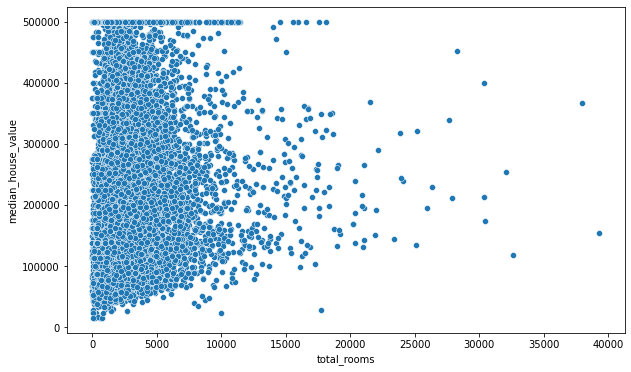

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['total_rooms'], y=df['median_house_value'])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

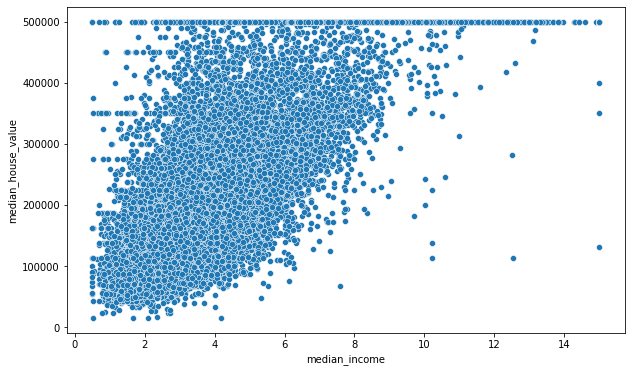

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['median_income'], y=df['median_house_value'])

<Figure size 720x360 with 0 Axes>

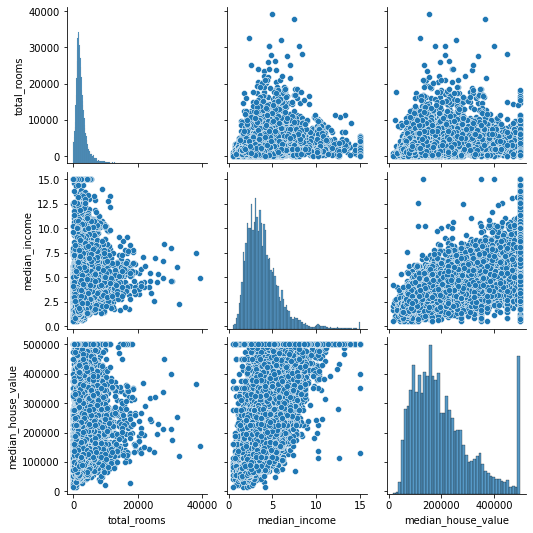

In [23]:
plt.figure(figsize=(10,5))
sns.pairplot(data=df)
plt.show()

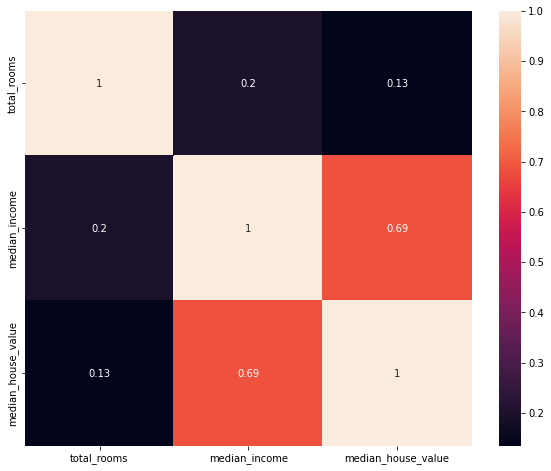

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
x_train.shape

(16512, 2)

In [49]:
y_train.shape

(16512,)

In [50]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [51]:
lr.score(x_test, y_test)

0.45884251923078045

In [59]:
# y= m1 total_rooms + m2 medn_income + c

In [60]:
lr.coef_

array([-1.62931129e-01,  4.19707396e+04])

In [57]:
lr.intercept_

44747.032262097666

In [61]:
# y = -1.62931129e-01  total_rooms +  4.19707396e+04 medn income +44747.032262097666

In [58]:
x.columns

Index(['total_rooms', 'median_income'], dtype='object')

In [62]:
y_pred = lr.predict(x_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
print(df)

       Real Values  Predicted Values
20046        47700     115063.028287
3024         45800     150508.059036
15663       500001     190185.376834
20484       218600     285061.244776
9814        278000     200704.986096
...            ...               ...
15362       263300     237506.610984
16623       266800     158480.099517
18086       500001     431458.754524
2144         72300     161227.073639
3665        151500     193540.138381

[4128 rows x 2 columns]
